# Parallel Wiener-Hammerstein system

See http://arxiv.org/pdf/1708.06543 for more information on the dataset.


In [3]:
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import nonlinear_benchmarks as nlb
import numpy as np
import optimistix as optx

from dep import fsid
from src import best_linear_approximation as bla
from src import training_data

np.random.seed(42)  # for reproducibility

# Load data
ParWH_full_train, ParWH_full_test = nlb.ParWH() 

# Initialise variables
N = 16384  # number of samples per period
R = 5  # number of random phase multisine realisations
P = 2  # number of periods
amplitude_level = 4  # must be one of {0, 1, 2, 3, 4}

nu, ny = 1, 1  # SISO system

fs = 78e3 # [Hz]
f_idx = np.arange(1, 4096)  # frequency lines of interest (excludes DC)

# Load data
ParWH_full_train, ParWH_full_test = nlb.ParWH() 
ParWH_train = [
    data for data in ParWH_full_train
    for phase in range(R)
    if data.name == f'Est-phase-{phase}-amp-{amplitude_level}'
]
ParWH_test = [
    data for data in ParWH_full_test
    if data.name == f'Val-amp-{amplitude_level}'
][0]

# Preprocess data
u_train = np.array([data.u for data in ParWH_train]).reshape(R, nu, N, P)
y_train = np.array([data.y for data in ParWH_train]).reshape(R, ny, N, P)
u_train = np.transpose(u_train, (2, 1, 0, 3))
y_train = np.transpose(y_train, (2, 1, 0, 3))

u_test = np.transpose(ParWH_test.u.reshape(1, nu, N, 2), (2, 1, 0, 3))
y_test = np.transpose(ParWH_test.y.reshape(1, ny, N, 2), (2, 1, 0, 3))

# Create input-output training data object
io_data = training_data.create_data_object(u_train, y_train, fs, f_idx)

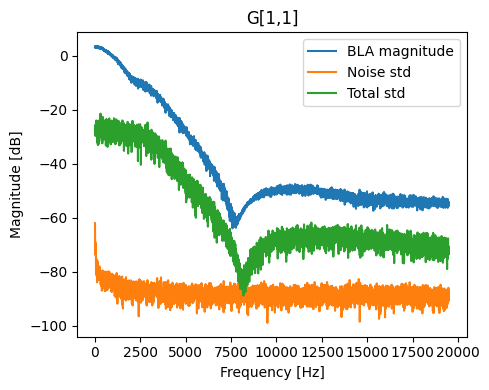

In [4]:
nonpar_bla = bla.compute_nonparametric(io_data)

nonpar_bla.plot()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Generate random values between 0 and 100
np.random.seed(42)
data = np.random.randint(0, 101, (5, 5))  # 5x5 table

# Create a colormap from red to green
cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["red", "green"])

fig, ax = plt.subplots(figsize=(5, 5))

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Display table-like heatmap
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        value = data[i, j]
        color = cmap(value / 100)  # Normalize to [0,1] for colormap
        ax.add_patch(plt.Rectangle((j, -i), 1, 1, color=color))
        ax.text(j + 0.5, -i + 0.5, f"{value}", ha='center', va='center', color="black")

# Adjust limits
ax.set_xlim(0, data.shape[1])
ax.set_ylim(-data.shape[0], 0)
ax.set_aspect("equal")

plt.show()


In [ ]:
# Estimate the best linear approximation
nx = 12
q = nx + 3

optim_options = bla_optimisation.OptiOptions(
    solver = optx.LevenbergMarquardt(rtol=1e-3, atol=1e-6),
    max_iter = 100
)

IDM.freq_subspace_id(nx, q, W='std_tot', optim_options=optim_options)

In [ ]:
polynomial_degree = 7
nw = 2
nz = 2

phi = basis_functions.Polynomial(nz=nz, cross_terms=False, degree=polynomial_degree)

lambda_w = 1
fixed_point_iters = 10
solver = optx.LevenbergMarquardt(rtol=1e-3, atol=1e-6, verbose=frozenset({'step', 'loss', 'accepted'}))
# solver = optx.BFGS(rtol=1e-3, atol=1e-6)
freeze_bla = True
seed = 3

mod = nonlinear_lfr_init.init(IDM, nw=nw, phi=phi, lambda_w=lambda_w, fixed_point_iters=fixed_point_iters, solver=solver, freeze_bla=freeze_bla, seed=seed, max_iter=50)

In [ ]:
# Optimise one-step-ahead state predictions (optional)
ModelNonlinearLFR_opti = nonlinear_lfr_opti.optimise_state_predictions(
    IDM,
    solver=optx.BFGS(rtol=1e-8, atol=1e-8),
)

In [ ]:
# # Optimise one-step-ahead state predictions (optional)
# ModelNonlinearLFR_opti = nonlinear_lfr_opti.optimise_state_predictions(
#     IDM,
#     solver=optx.BFGS(rtol=1e-8, atol=1e-8),
# )

In [ ]:
# Optimise simulation error# Optimise one-step-ahead state predictions (optional)
# ModelNonlinearLFR_opti = nonlinear_lfr_opti.optimise_state_predictions(
#     IDM,
#     solver=optx.BFGS(rtol=1e-8, atol=1e-8),
# )

from reinbos.utils import misc

custom_init = nonlinear_lfr_opti.DecisionVars(
    B_w=misc.OptiParam(1/10*ModelNonlinearLFR.B_w),
    D_yw=misc.OptiParam(1/10*ModelNonlinearLFR.D_yw),
)


ModelNonlinearLFR_opti_sim = nonlinear_lfr_opti.optimise_simulation_error(
    IDM,
    solver=optx.LevenbergMarquardt(rtol=1e-3, atol=1e-6),
    max_iter=200,
    custom_init=custom_init,
)

In [ ]:
# Evaluate the model on test data
ParWH_test = [
    data for data in ParWH_full_test
    if data.name == f'Val-amp-{amp_level}' or data.name == 'ValArr'
]

test_ms = ParWH_test[0]
test_arr = ParWH_test[2]

# Multisine test
u_test_ms = np.transpose(test_ms.u.reshape(1, nu, N, 2), (2, 1, 0, 3))
y_test_ms = test_ms.y[::2]
u_test_ms = (u_test_ms - u_mean) / u_std

y_bla_ms = IDM.bla.opti.model.simulate(u_test_ms)[1]
y_lfr_ms = ModelNonlinearLFR_opti_sim.simulate(u_test_ms)[2]
y_bla_ms = np.squeeze(y_bla_ms[..., 1] * y_std + y_mean)
y_lfr_ms = np.squeeze(y_lfr_ms[..., 1] * y_std + y_mean)

e_bla_ms = y_test_ms - y_bla_ms
e_lfr_ms = y_test_ms - y_lfr_ms

E_bla_ms = 1 / N * np.fft.rfft(e_bla_ms, axis=0)
E_lfr_ms = 1 / N * np.fft.rfft(e_lfr_ms, axis=0)
Y_test_ms = 1 / N * np.fft.rfft(y_test_ms, axis=0)

print(f'Multisine test RMSE BLA: {np.sqrt(np.mean(e_bla_ms**2)):.4e} ({100*np.std(e_bla_ms)/np.std(y_test_ms):.2f}%)')
print(f'Multisine test RMSE nonlinear LFR: {np.sqrt(np.mean(e_lfr_ms**2)):.4e} ({100*np.std(e_lfr_ms)/np.std(y_test_ms):.2f}%)')

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(IDM.data.time.t, y_test_ms, label='system output')
axs[0].plot(IDM.data.time.t, e_bla_ms, label='BLA error')
axs[0].plot(IDM.data.time.t, e_lfr_ms, label='nonlinear LFR error')
axs[0].set_title('Multisine - Time Domain')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('amplitude [-]')
axs[0].legend()

axs[1].plot(IDM.data.freq.f[f_idx], 20*np.log10(np.abs(Y_test_ms[f_idx])), label='system output')
axs[1].plot(IDM.data.freq.f[f_idx], 20*np.log10(np.abs(E_bla_ms[f_idx])), label='BLA error')
axs[1].plot(IDM.data.freq.f[f_idx], 20*np.log10(np.abs(E_lfr_ms[f_idx])), label='nonlinear LFR error')
axs[1].set_title('Multisine - Frequency Domain')
axs[1].set_xlabel('frequency [Hz]')
axs[1].set_ylabel('magnitude [dB]')
axs[1].legend()
plt.tight_layout()
plt.show()


# Arrow test
u_test_arr = test_arr.u.reshape(-1, 1, 1)
u_test_arr = (u_test_arr - u_mean) / u_std
y_test_arr = test_arr.y

y_bla_ss = IDM.bla.opti.model.simulate(u_test_arr, P_trans=1)[1]
y_lfr_ss = ModelNonlinearLFR_opti_sim.simulate(u_test_arr, P_trans=1)[2]
y_bla_ss = np.squeeze(y_bla_ss * y_std + y_mean)
y_lfr_ss = np.squeeze(y_lfr_ss * y_std + y_mean)

e_bla_ss = y_test_arr - y_bla_ss
e_lfr_ss = y_test_arr - y_lfr_ss

print(f'Arrow test RMSE BLA: {np.sqrt(np.mean(e_bla_ss**2)):.4e} ({100*np.std(e_bla_ss)/np.std(y_test_arr):.2f}%)')
print(f'Arrow test RMSE nonlinear LFR: {np.sqrt(np.mean(e_lfr_ss**2)):.4e} ({100*np.std(e_lfr_ss)/np.std(y_test_arr):.2f}%)')

t_ss = np.linspace(0, len(y_test_arr) / fs, len(y_test_arr))

plt.figure(figsize=(8, 5))
plt.plot(t_ss, y_test_arr, label='system output')
plt.plot(t_ss, e_bla_ss, label='BLA error')
plt.plot(t_ss, e_lfr_ss, label='nonlinear LFR error')
plt.title('Arrow test - Time Domain')
plt.xlabel('time [s]')
plt.ylabel('amplitude [-]')
plt.legend()
plt.tight_layout()
plt.show()
